# Node classfication

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from main_utils import *
from plot_utils import *

/tmp/ipykernel_1250/702283646.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### BlogCatalog 

In [4]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

model = Word2Vec.load("models/blog_model")

groups_dict = {node_num: group_df.loc[node_num, 'group']  for node_num in group_df['node_num']}

X, y, _ = emb_group_gen(groups_dict, model)


# # Plot
# test_grid_search(G, X, y)

## Extending

### Stochastic Block Model

In [3]:
sizes = [200, 100, 150]

probs = [[0.01, 0.025, 0.02],
         [0.025, 0.05, 0.02],
         [0.02, 0.02, 0.01]]

initial_graph = nx.stochastic_block_model(sizes, probs, seed=0)
# initial_graph.remove_nodes_from([0, 4])

In [4]:
initial_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

#### Testing modification of node2vec

In [5]:
params=[64, 10, 80, 0.25, 4]

[d, r, l, p, q] = params


node2vec = Node2Vec(initial_graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', quiet=
                    True, starting_nodes=[1, 2, 3])  # Use temp_folder for big graphs


30


In [6]:
params=[64, 10, 80, 0.25, 4]

[d, r, l, p, q] = params


node2vec = Node2Vec(initial_graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', quiet=
                    True)  # Use temp_folder for big graphs


4500


In [9]:
model = node2vec.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)


In [12]:
groups_dict = groups_assign(initial_graph, initial_graph)

In [15]:
X, y, node_vectors_dict = emb_group_gen(groups_dict, model)

In [16]:
node_vectors_dict

{1: array([ 0.12297638, -0.2767483 ,  0.33577508,  0.23089078,  0.05274112,
        -0.02412029,  0.00328439,  0.07812443, -0.33633894,  0.00383592,
         0.1445464 , -0.14787456, -0.17155007,  0.0133511 ,  0.13305132,
         0.20510533,  0.08361273, -0.00674732,  0.04461128,  0.20292534,
         0.07794575,  0.18805967,  0.08637419, -0.18677537, -0.10437877,
         0.00251989, -0.09543766,  0.13203849,  0.06816937, -0.02482752,
         0.02767761,  0.11712021, -0.12780543, -0.08297081, -0.04143419,
        -0.04838149,  0.13651367, -0.07123523, -0.170192  ,  0.19355117,
        -0.00845771,  0.11327805,  0.08596561, -0.03772712,  0.12978387,
        -0.0076956 , -0.00703465,  0.08806483,  0.02236837,  0.2292983 ,
        -0.08193902, -0.04389409,  0.19257714, -0.05987369,  0.12317252,
        -0.06894404,  0.15212528,  0.04360842, -0.07858608,  0.11404926,
        -0.04164899,  0.12926735,  0.21047093, -0.12922382], dtype=float32),
 290: array([ 0.15293479, -0.3052231 ,  0.34

In [4]:
ext_subgraph = nx.erdos_renyi_graph(n=125, p=0.45, seed=12)

# Relabel the subgraph based on the initial graph
ext_subgraph = relabel_subgraph(initial_graph, ext_subgraph)

In [5]:
compare_models(initial_graph, ext_subgraph)

Model generated.
Model generated.
Model generated.
New graph (from scratch)
For training size: 0.9: [[0.1896551724137931, 0.17868819776714515]]
For training size: 0.8: [[0.19130434782608696, 0.18707059359190312]]
For training size: 0.7: [[0.16184971098265896, 0.16011281219793028]]
For training size: 0.6: [[0.15217391304347827, 0.1510822567600061]]
For training size: 0.5: [[0.17708333333333334, 0.17413905431701227]]
For training size: 0.4: [[0.19130434782608696, 0.18805658357954477]]
For training size: 0.3: [[0.18362282878411912, 0.17545533711845712]]
For training size: 0.2: [[0.21956521739130436, 0.2138567283830442]]
For training size: 0.1: [[0.1718146718146718, 0.16537349179699748]]



Manually updated graph (extending the graph)
For training size: 0.9: [[0.25862068965517243, 0.24748917748917748]]
For training size: 0.8: [[0.25217391304347825, 0.248300395256917]]
For training size: 0.7: [[0.23699421965317918, 0.23027756976984576]]
For training size: 0.6: [[0.2565217391304348, 0.255371

In [45]:
# ext_subgraph = relabel_subgraph(initial_graph, ext_subgraph)

# [node_main, node_sub], mod_graph = connect_subgraph(initial_graph, ext_subgraph)

# print(f'Main node: {node_main}')
# print(f'Sub node: {node_sub}')

In [46]:
# list(initial_graph.neighbors(node_main))

In [47]:
# len(list(get_neighborhood(initial_graph, 2, 1).nodes()))

In [51]:
# enh_ext_subgraph = enhanced_ext_subgraph_func(initial_graph, ext_subgraph, node_main, max_step=2)

In [25]:
# plot_graph(ext_subgraph)

In [26]:
# plot_graph(enh_ext_subgraph)

In [27]:
# print(f'Extending subgraph nodes: {sorted(ext_subgraph.nodes())}')
# print(f'Enhanced extending subgraph nodes: {sorted(enh_ext_subgraph.nodes())}')

In [28]:
# len(initial_graph.nodes()), len(initial_graph.edges())
# len(ext_subgraph.nodes()), len(ext_subgraph.edges())
# len(enh_ext_subgraph.nodes()), len(enh_ext_subgraph.edges())
# len(mod_graph.nodes()), len(mod_graph.edges())

In [10]:
# params = [64, 10, 80, 0.25, 4]

# groups_dict = groups_assign(initial_graph, relabel_subgraph(initial_graph, ext_subgraph))

# X_ext, y_ext = generate_extended_embeddings(initial_graph, ext_subgraph, params, groups_dict)

# [node_main, node_sub], mod_graph = connect_subgraph(initial_graph, ext_subgraph)
# enh_ext_subgraph = enhanced_ext_subgraph_func(initial_graph, ext_subgraph, node_main, max_step=2)

# node2vec_initial, model_initial = model_gen(initial_graph, params)
# node2vec_ext, model_ext = model_gen(enh_ext_subgraph, params)
# node2vec_mod, model_mod = model_gen(mod_graph, params)

In [108]:
# test_grid_search(mod_graph, X_fast, y_fast)
# test_grid_search(mod_graph, X_mod, y_mod)

### Cora dataset 

In [15]:
data_dir = os.path.expanduser("~/thesis/datasets/cora")
params = [64, 10, 80, 0.25, 4]

edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

initial_graph = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(initial_graph, "paper", "label")

feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)

group_df = node_data['subject'].reset_index()
group_df.columns = ['node_num', 'group']

group_df['group'], _ = pd.factorize(group_df['group'])
group_df['group'] += 4 # number of groups for new graph
group_df.head()

,node_num,group
0,31336,4
1,1061127,5
2,1106406,6
3,13195,6
4,37879,7


In [16]:
test_sizes = np.arange(0.1, 1, 0.1)

ext_subgraph = nx.erdos_renyi_graph(n=75, p=0.35, seed=12)

# Relabel the subgraph based on the initial graph
ext_subgraph = relabel_subgraph(initial_graph, ext_subgraph)

# # This is the reason
# len(group_df.value_counts())

groups_dict  = groups_assign(initial_graph, ext_subgraph, group_df)

X_mod, y_mod, X_manual, y_manual = initial_extending_embeddings(initial_graph, ext_subgraph, group_df=group_df)

# results_output_func(X_mod, y_mod, X_manual, y_manual, test_sizes)

Model generated - (|V| = 2708 , |E| = 5278)
Model generated - (|V| = 2783 , |E| = 6262)
Model generated - (|V| = 85 , |E| = 994)


In [5]:
ovr_classifier(X_mod, y_mod, 0.1)

{0.9: [0.7741935483870968, 0.6029661288267909]}

In [10]:
def avg_f1_micro_func(X, y, test_sizes):
    '''
        Returns average f1 micro score for certain embeddings
    '''

    f1_micros = [list(ovr_classifier(X, y, test_size).values())[0] for test_size in test_sizes]
    avg_f1_micro = np.mean(f1_micros)

    return avg_f1_micro

In [13]:
avg_f1_micro_func(X_mod, y_mod, test_sizes)

0.6378884959200078

In [14]:
avg_f1_micro_func(X_manual, y_manual, test_sizes)

0.6447975091111858

### BlogCatalog

In [10]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

initial_graph = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
initial_graph.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

model = Word2Vec.load("models/blog_model")

In [12]:
ext_subgraph = nx.erdos_renyi_graph(n=75, p=0.35, seed=12)

# Relabel the subgraph based on the initial graph
ext_subgraph = relabel_subgraph(initial_graph, ext_subgraph)

In [22]:
max(map(int, initial_graph.nodes())) + 1

10313

In [24]:
initial_graph.nodes()

NodeView(('1', '176', '233', '283', '371', '394', '446', '585', '645', '667', '696', '753', '792', '867', '911', '996', '1136', '1175', '1263', '1443', '1644', '1787', '1811', '1876', '1971', '2369', '2461', '2521', '2624', '2771', '2861', '2999', '3122', '3198', '3204', '3258', '3262', '3339', '3407', '3489', '3561', '3599', '3608', '3820', '3940', '4062', '4374', '4390', '4491', '4613', '4652', '4723', '4836', '4839', '4843', '4928', '4984', '4997', '5092', '5152', '5204', '5241', '5259', '5311', '5334', '5346', '5377', '5450', '5488', '5685', '5705', '5851', '5906', '5912', '5999', '6030', '6066', '6074', '6141', '6179', '6187', '6539', '6551', '6552', '6639', '6643', '6753', '6832', '6860', '6895', '6907', '6950', '6959', '7019', '7098', '7149', '7228', '7370', '7373', '7495', '7545', '7748', '7806', '7922', '7966', '7989', '8056', '8099', '8234', '8387', '8524', '8525', '8859', '8969', '8976', '9824', '9919', '9961', '9997', '10143', '2', '2241', '2803', '4845', '6873', '8868', '8

In [13]:
ext_subgraph.nodes()

NodeView((10313, 10314, 10315, 10316, 10317, 10318, 10319, 10320, 10321, 10322, 10323, 10324, 10325, 10326, 10327, 10328, 10329, 10330, 10331, 10332, 10333, 10334, 10335, 10336, 10337, 10338, 10339, 10340, 10341, 10342, 10343, 10344, 10345, 10346, 10347, 10348, 10349, 10350, 10351, 10352, 10353, 10354, 10355, 10356, 10357, 10358, 10359, 10360, 10361, 10362, 10363, 10364, 10365, 10366, 10367, 10368, 10369, 10370, 10371, 10372, 10373, 10374, 10375, 10376, 10377, 10378, 10379, 10380, 10381, 10382, 10383, 10384, 10385, 10386, 10387))

In [ ]:
compare_models(initial_graph, ext_subgraph, existing_filename="models/blog_model", group_df=group_df)

In [27]:
enh_ext_subgraph = enhanced_ext_subgraph_func(initial_graph, ext_subgraph, node_main='283', max_step=2)

In [30]:
params=[64, 10, 80, 0.25, 4]
groups_dict = groups_assign(initial_graph, ext_subgraph, group_df)

generate_extended_embeddings(initial_graph, ext_subgraph, params, groups_dict)

Model generated.


KeyError: 10313

KeyError                                  Traceback (most recent call last)
Cell In[18], line 6
      3 # Relabel the subgraph based on the initial graph
      4 ext_subgraph = relabel_subgraph(initial_graph, ext_subgraph)
----> 6 compare_models(initial_graph, ext_subgraph, existing_filename="models/blog_model", group_df=group_df)

Cell In[14], line 24
     21 X_mod, y_mod, _ = emb_group_gen(groups_dict, model_mod)
     23 # Generate embeddings for the extending subgraph, without common embeddings with initial graph
---> 24 X_ext, y_ext = generate_extended_embeddings(initial_graph, ext_subgraph, params, groups_dict)
     26 # Combine initial and extended embeddings for manual model
     27 X_manual = X_initial + X_ext

File ~/thesis/utils.py:606, in generate_extended_embeddings(initial_graph, ext_subgraph, params, groups_dict)
    598 _, model_ext = model_gen(enh_ext_subgraph, params)
    599 _, _, node_vectors_dict_ext = emb_group_gen(groups_dict, model_ext)
    601 # ## Previous method, slow
    602 # # Generate model and embeddings for the initial graph
    603 # _, model_initial = model_gen(initial_graph, params)
    604 # _, _, node_vectors_dict_initial = emb_group_gen(groups_dict, model_initial)
    605 
--> 606 # # Find nodes that are in the extended subgraph but not in the initial graph embeddings
    607 # kept_nodes = set(enh_ext_subgraph.nodes()) - set(node_vectors_dict_initial.keys()).intersection(enh_ext_subgraph.nodes())
    608 # print(kept_nodes)
...
    608 # print(kept_nodes)
    610 kept_nodes = list(ext_subgraph.nodes())
    612 # Gather X_ext and y_ext for the kept nodes

KeyError: 10313

In [28]:
# Fill these similar to previous cells - make a function

In [61]:
params = [64, 10, 80, 0.25, 4]

In [ ]:
groups_dict = groups_assign(initial_graph, ext_subgraph)

# Generate embeddings for the extending subgraph, without common embeddings with initial graph
X_ext, y_ext = generate_extended_embeddings(initial_graph, ext_subgraph, params, groups_dict)

## Finding nearby area of node

In [29]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# plt.figure(figsize=(3, 3))
# nx.draw(G, with_labels=True)
# plt.show()

In [32]:
len(get_neighborhood(G, '1', 1).nodes())

119

In [33]:
len(get_neighborhood(G, '1', 2).nodes())

9554

In [34]:
G = nx.random_regular_graph(3, 40, seed=10)

# plt.figure(figsize=(3, 3))
# nx.draw(G, with_labels=True)
# plt.show()

In [35]:
list(get_neighborhood(G, 0, 1))

[25, 4, 15]

In [36]:
list(get_neighborhood(G, 0, 3))

[33, 34, 4, 36, 6, 7, 37, 38, 14, 15, 16, 18, 22, 25, 27, 28, 29, 31]

## Pruning

### BlogCatalog

In [3]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

# blog_dir = 'datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

In [1]:
def plot_graph(graph, node_type_list=[]):
    '''
        Helper function to draw graph with specific colors
    '''

    # The order is: removed nodes, neighbors and added vertices
    colors_list = ['red', 'orange', 'green']

    node_num = graph.number_of_nodes()
    node_colors = node_num * ['blue']

    for node_list in node_type_list:
        color = colors_list[node_type_list.index(node_list)]

        for node in node_list:
            node_colors[node] = color
        
    is_disconnected = nx.number_connected_components(graph) > 1

    if is_disconnected:
        pos = nx.spring_layout(graph)
    else:
        pos = nx.kamada_kawai_layout(graph)

    plt.figure(figsize=(4, 4))
    nx.draw_networkx(graph, pos, node_size=75, font_size=6, edge_color='grey', node_color=node_colors)
    plt.show()

### Other graphs

In [36]:
def plot_graph(graph, node_type_list=[], labels_bool=True):
    '''
        Helper function to draw graph with specific colors
    '''

    # The order is: removed nodes, neighbors and added vertices
    colors_list = ['red', 'orange', 'green']

    node_num = graph.number_of_nodes()
    node_colors = node_num * ['lightblue']

    for node_list in node_type_list:
        color = colors_list[node_type_list.index(node_list)]

        for node in node_list:
            node_colors[node] = color
        
    is_disconnected = nx.number_connected_components(graph) > 1

    if is_disconnected:
        pos = nx.spring_layout(graph)
    else:
        pos = nx.kamada_kawai_layout(graph)

    plt.figure(figsize=(6, 6))

    if labels_bool == True:
        nx.draw_networkx(graph, pos, node_size=75, font_size=6, edge_color='grey', node_color=node_colors, with_labels=labels_bool)
    else:
        nx.draw_networkx(graph, pos, node_size=35, font_size=6, edge_color='black', node_color=node_colors, with_labels=labels_bool)
    
    plt.show()

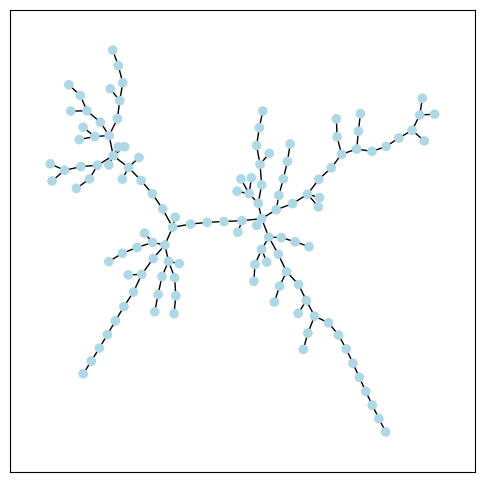

In [37]:
params = [64, 10, 80, 0.25, 4]
initial_graph = nx.random_tree(128, seed=1)

plot_graph(initial_graph, labels_bool=False)

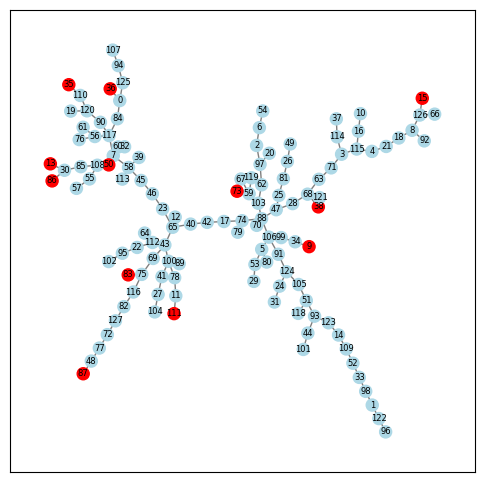

In [38]:
pruned_graph, removed_nodes_edges_dict = remove_nodes_connected(initial_graph, num_nodes=12)
removed_nodes = removed_nodes_edges_dict.keys()

plot_graph(initial_graph, [removed_nodes, [], []])

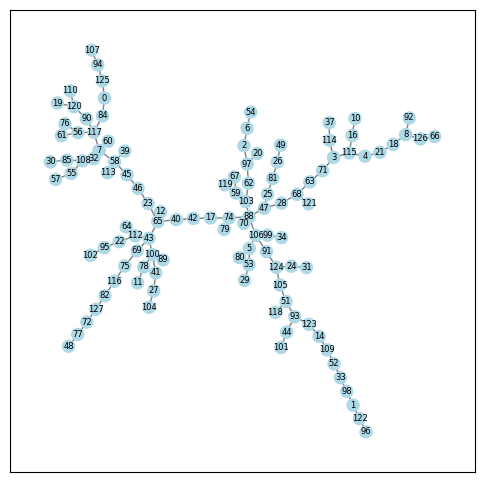

In [39]:
plot_graph(pruned_graph)

In [40]:
neighbors = removed_nodes_neighbors_func(initial_graph, removed_nodes)

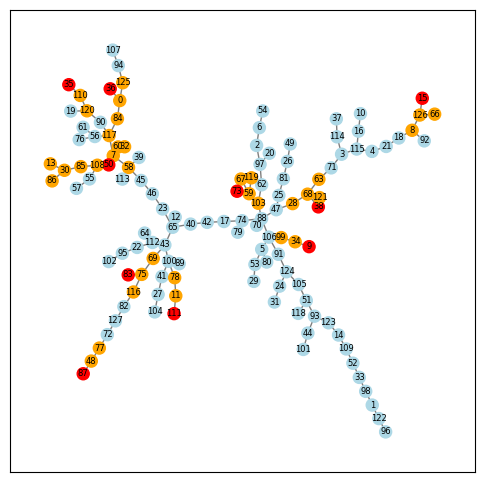

In [41]:
plot_graph(initial_graph, [removed_nodes, neighbors, []])

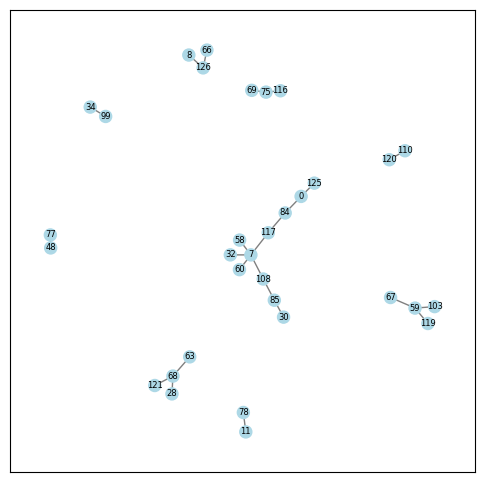

In [42]:
temp_neighbors_subgraph = initial_graph.subgraph(neighbors)

neighbors_subgraph = temp_neighbors_subgraph.copy()
neighbors_subgraph.remove_nodes_from(removed_nodes)

plot_graph(neighbors_subgraph)

In [9]:
len(removed_nodes)

12

In [10]:
X_pruned, y_pruned, X_mod, y_mod = pruned_modified_embeddings(initial_graph, params)

1280
Model generated - (|V| = 128 , |E| = 127)
320
Model generated - (|V| = 32 , |E| = 24)
1160
Model generated - (|V| = 116 , |E| = 115)


In [11]:
len(X_mod), len(X_pruned)

(116, 116)

In [29]:
test_sizes = np.arange(0.1, 1, 0.1)

print("from scratch")
for test_size in test_sizes:
    print(f"For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_pruned, y_pruned, test_size).values())}")

print(2 * '\n')

print("updating embeddings")
for test_size in test_sizes:
    print(f"For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_mod, y_mod, test_size).values())}")

from scratch
For training size: 0.9: [[0.25, 0.16666666666666666]]
For training size: 0.8: [[0.125, 0.11717171717171718]]
For training size: 0.7: [[0.2, 0.16911764705882354]]
For training size: 0.6: [[0.23404255319148937, 0.2063673168936327]]
For training size: 0.5: [[0.20689655172413793, 0.18706158357771258]]
For training size: 0.4: [[0.15714285714285714, 0.14642678660669664]]
For training size: 0.3: [[0.15853658536585366, 0.14372549019607841]]
For training size: 0.2: [[0.16129032258064516, 0.12858066303444454]]
For training size: 0.1: [[0.1619047619047619, 0.10308946056072492]]



updating embeddings
For training size: 0.9: [[0.16666666666666666, 0.13714285714285715]]
For training size: 0.8: [[0.125, 0.10158730158730159]]
For training size: 0.7: [[0.11428571428571428, 0.09350649350649351]]
For training size: 0.6: [[0.14893617021276595, 0.13066666666666665]]
For training size: 0.5: [[0.1724137931034483, 0.15421804249390458]]
For training size: 0.4: [[0.22857142857142856, 0.19861541966

## Wikipedia (.mat file)

In [7]:
filepath = 'datasets/wikipedia/POS.mat'
initial_graph, group_df = mat_load_func(filepath)
len(set(group_df['group']))

40

## PPI

In [8]:
initial_graph, group_df = mat_load_func('datasets/PPI/PPI.mat')
len(set(group_df['group']))

50

## Cora

In [3]:
data_dir = os.path.expanduser("~/thesis/datasets/cora")

edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

initial_graph = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(initial_graph, "paper", "label")

feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)

group_df = node_data['subject'].reset_index()
group_df.columns = ['node_num', 'group']

group_df['group'], _ = pd.factorize(group_df['group'])
group_df['group'] += 4 # number of groups for new graph
group_df.head()

,node_num,group
0,31336,4
1,1061127,5
2,1106406,6
3,13195,6
4,37879,7


In [4]:
# Create an example undirected graph
G = nx.erdos_renyi_graph(128, 0.45)

# Determine the connected components
components = list(nx.connected_components(G))
len(components)

1

In [5]:
# Determine the connected components
components = list(nx.connected_components(initial_graph))
len(components)

78

## Facebook

In [ ]:
facebook = pd.read_csv(
    "datasets/facebook/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

initial_graph = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

In [ ]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

pos = nx.spring_layout(initial_graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(initial_graph, pos=pos, ax=ax, **plot_options)

## arXiv

In [5]:
arxiv = pd.read_csv(
    "datasets/arxiv/ca-AstroPh.txt",
    sep="	",
    names=["start_node", "end_node"],
)

initial_graph = nx.from_pandas_edgelist(arxiv, "start_node", "end_node")

In [6]:
arxiv

,start_node,end_node
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229
...,...,...
396155,49676,50641
396156,49676,57507
396157,50641,26325
396158,50641,49676
